In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


In [68]:
data=pd.read_csv(r"C:\Users\ajayy\Downloads\train.csv")


In [70]:
print(data.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [72]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [74]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
data['Age'].fillna(data['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [78]:
data['Embarked'].fillna(data['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [80]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


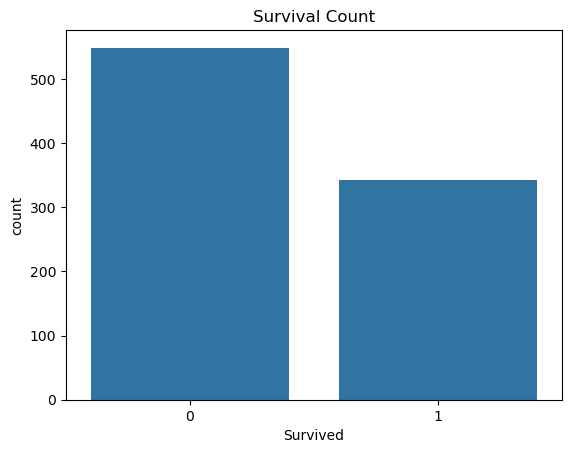

In [82]:
sns.countplot(x='Survived',data=data)
plt.title('Survival Count')
plt.show()

In [87]:
data=data.drop(['Cabin','Ticket','Name'],axis=1,errors='ignore')
le=LabelEncoder()

In [89]:
data['Sex']=le.fit_transform(data['Sex'])#male:1,female:0
data['Embarked']=le.fit_transform(data['Embarked'])#c:0,Q:1,s:2

In [91]:
print(data.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0              1         0       3    1  22.0      1      0   7.2500         2
1              2         1       1    0  38.0      1      0  71.2833         0
2              3         1       3    0  26.0      0      0   7.9250         2
3              4         1       1    0  35.0      1      0  53.1000         2
4              5         0       3    1  35.0      0      0   8.0500         2
..           ...       ...     ...  ...   ...    ...    ...      ...       ...
886          887         0       2    1  27.0      0      0  13.0000         2
887          888         1       1    0  19.0      0      0  30.0000         2
888          889         0       3    0   NaN      1      2  23.4500         2
889          890         1       1    1  26.0      0      0  30.0000         0
890          891         0       3    1  32.0      0      0   7.7500         1

[891 rows x 9 columns

In [93]:
X=data.drop(['Survived','PassengerId'],axis=1)
Y=data['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [95]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

Accuracy:0.832402


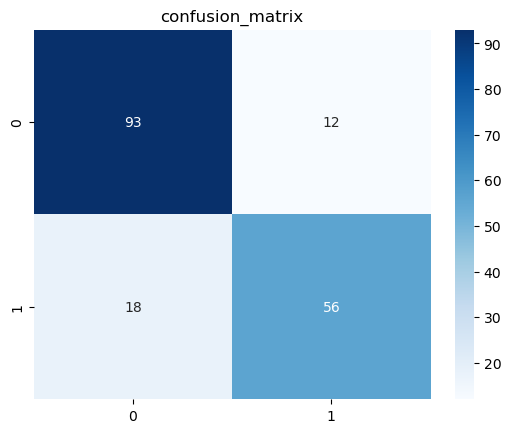

In [96]:
accuracy=accuracy_score(Y_test,Y_pred)
print(f'Accuracy:{accuracy:2f}')
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion_matrix')
plt.show()

In [103]:
test_data=pd.read_csv(r"C:\Users\ajayy\Downloads\test.csv")
test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'].fillna(test_data['Fare'].median())
test_data=test_data.drop(['Cabin','Ticket','Name'],axis=1,errors='ignore')
test_data['Sex']=le.fit_transform(test_data['Sex'])
test_data['Embarked']=le.fit_transform(test_data['Embarked'])
X_test_final=test_data.drop('PassengerId',axis=1)
predictions=model.predict(X_test_final)
submission=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':predictions})
submission.to_csv('submission.csv',index=False)
print("submission file created!")

submission file created!
